# Business Problem: Predict Heart Dieases Prediction using historical data on customers.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_excel('Heart_Disease.xlsx')

In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Domain Analysis

Here's a concise description of the dataset:

- **patient_id (int)**: Unique identifier for each patient.
- **slope_of_peak_exercise_st_segment (int)**: Slope of the peak exercise ST segment indicating blood flow quality.
- **thal (categorical)**: Thallium stress test results, with values: `normal`, `fixed_defect`, `reversible_defect`.
- **resting_blood_pressure (int)**: Resting blood pressure (mm Hg).
- **chest_pain_type (int)**: Type of chest pain (4 categories).
- **num_major_vessels (int)**: Number of major vessels (0-3) colored by fluoroscopy.
- **fasting_blood_sugar_gt_120_mg_per_dl (binary)**: Fasting blood sugar > 120 mg/dl (0: No, 1: Yes).
- **resting_ekg_results (int)**: Resting electrocardiographic results (0, 1, 2).
- **serum_cholesterol_mg_per_dl (int)**: Serum cholesterol level (mg/dl).
- **oldpeak_eq_st_depression (float)**: ST depression induced by exercise relative to rest.
- **sex (binary)**: 0: Female, 1: Male.
- **age (int)**: Age in years.
- **max_heart_rate_achieved (int)**: Maximum heart rate achieved (bpm).
- **exercise_induced_angina (binary)**: Exercise-induced chest pain (0: No, 1: Yes).

# Basic Checks

In [ ]:
data.

In [4]:
data = data.drop(columns='patient_id',axis=1)

In [5]:
data.shape

(180, 14)

In [6]:
# Checking Null values
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [9]:
data_cat = ['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','heart_disease_present']
data_dis = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age']

In [10]:
data.describe(include='O')

,thal
count,180
unique,3
top,normal
freq,98


In [11]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [12]:
data.duplicated().sum()

0

In [13]:
data.thal = data.thal.map({'fixed_defect':2,'reversible_defect':1,'normal':0})#imputation using map function

# Exploratory Data Analysis

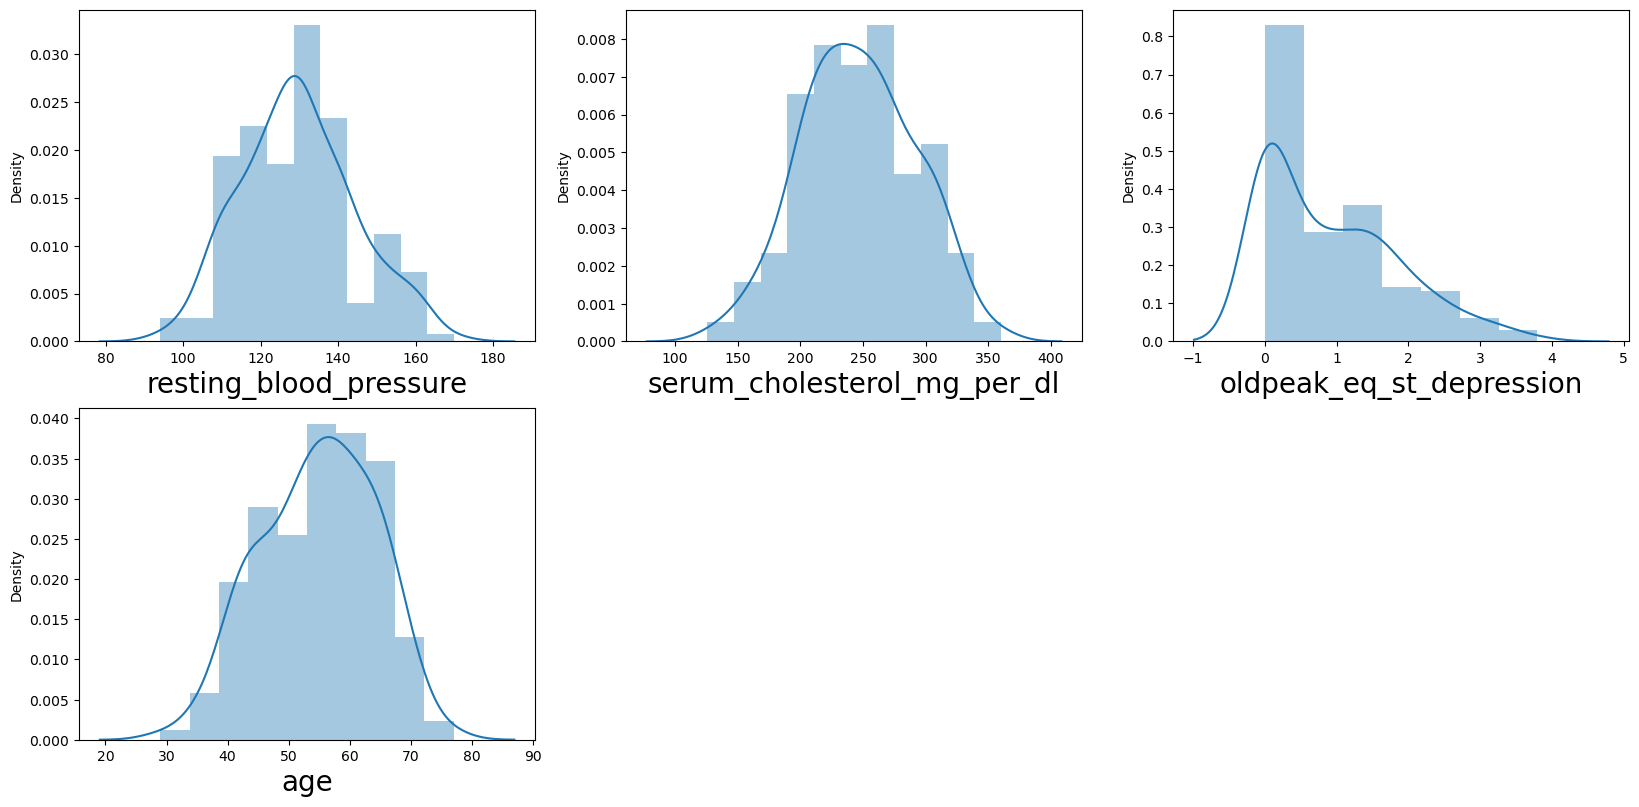

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_dis:
    if plotnumber<= 4:     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Insights

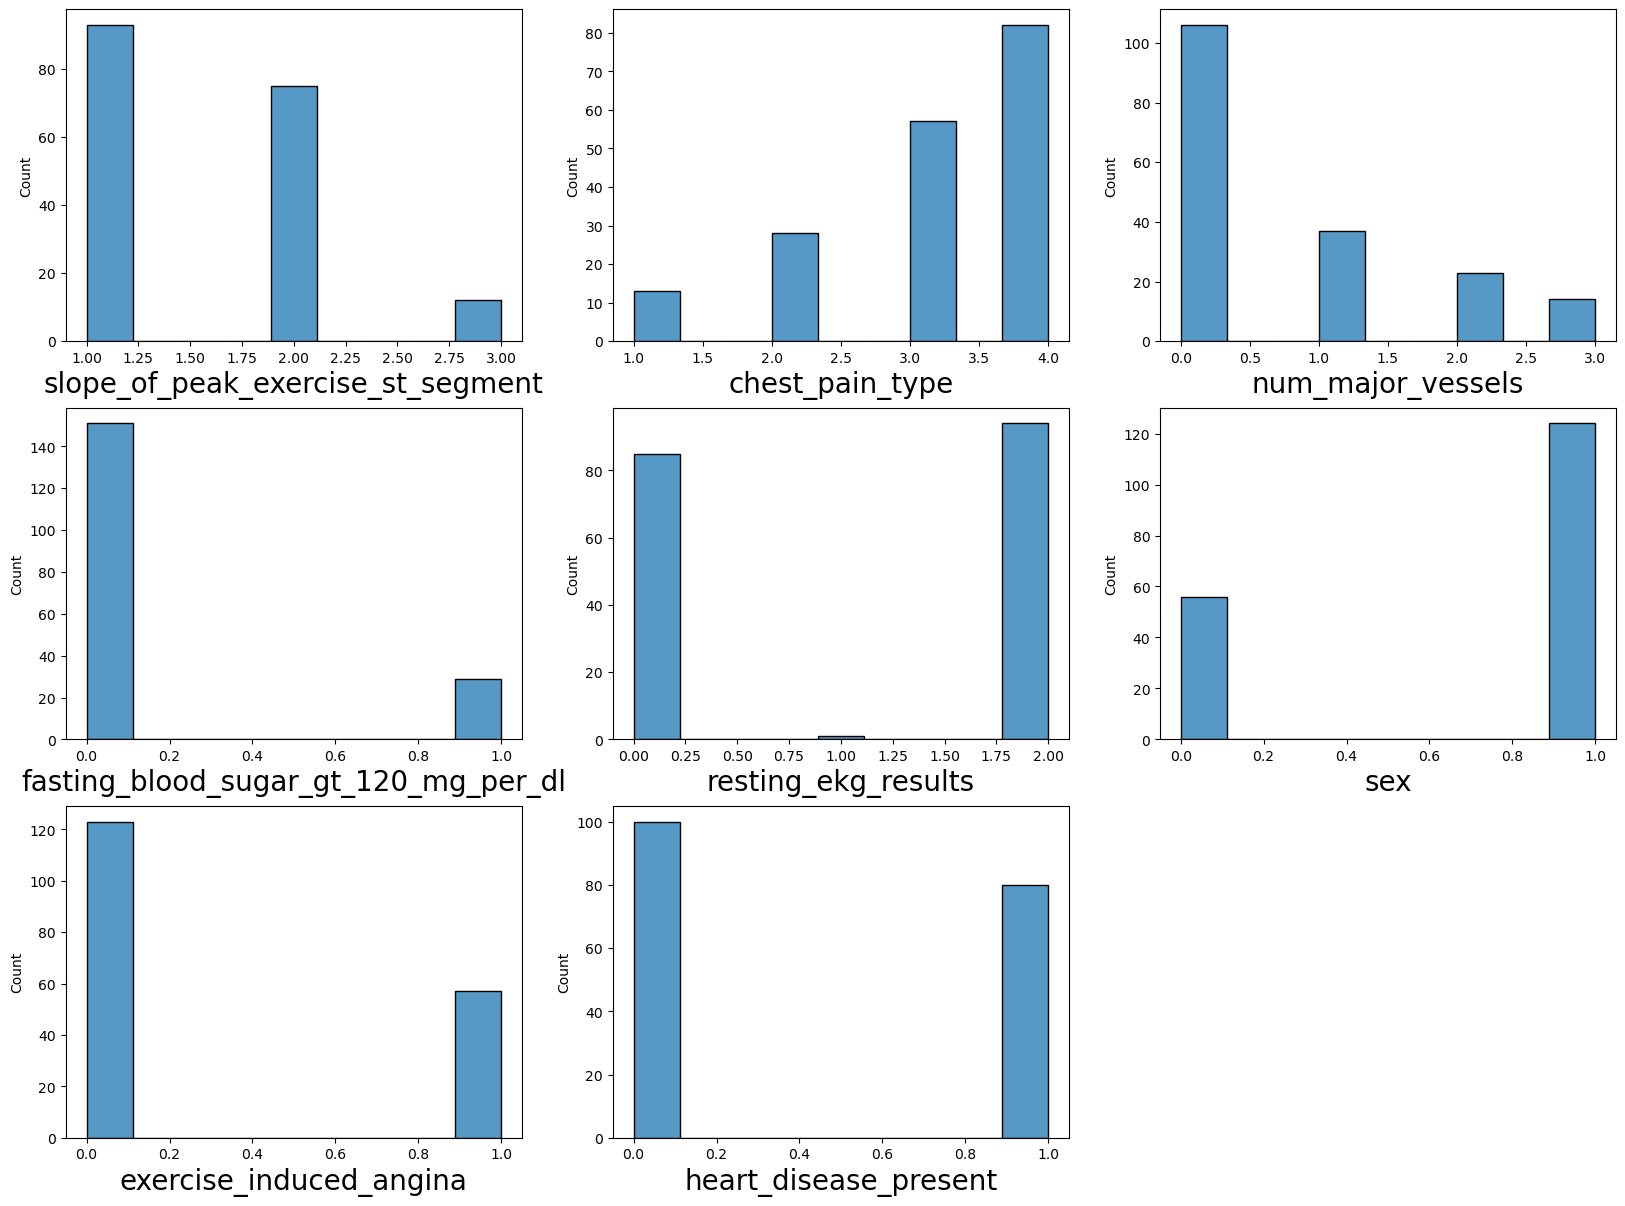

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cat:
    if plotnumber<= 8:     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(data[column],kde=False)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Bivariate Analysis

# Checking relationship of all variables with respect to target variable

In [16]:
data1 = data[['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','heart_disease_present']]

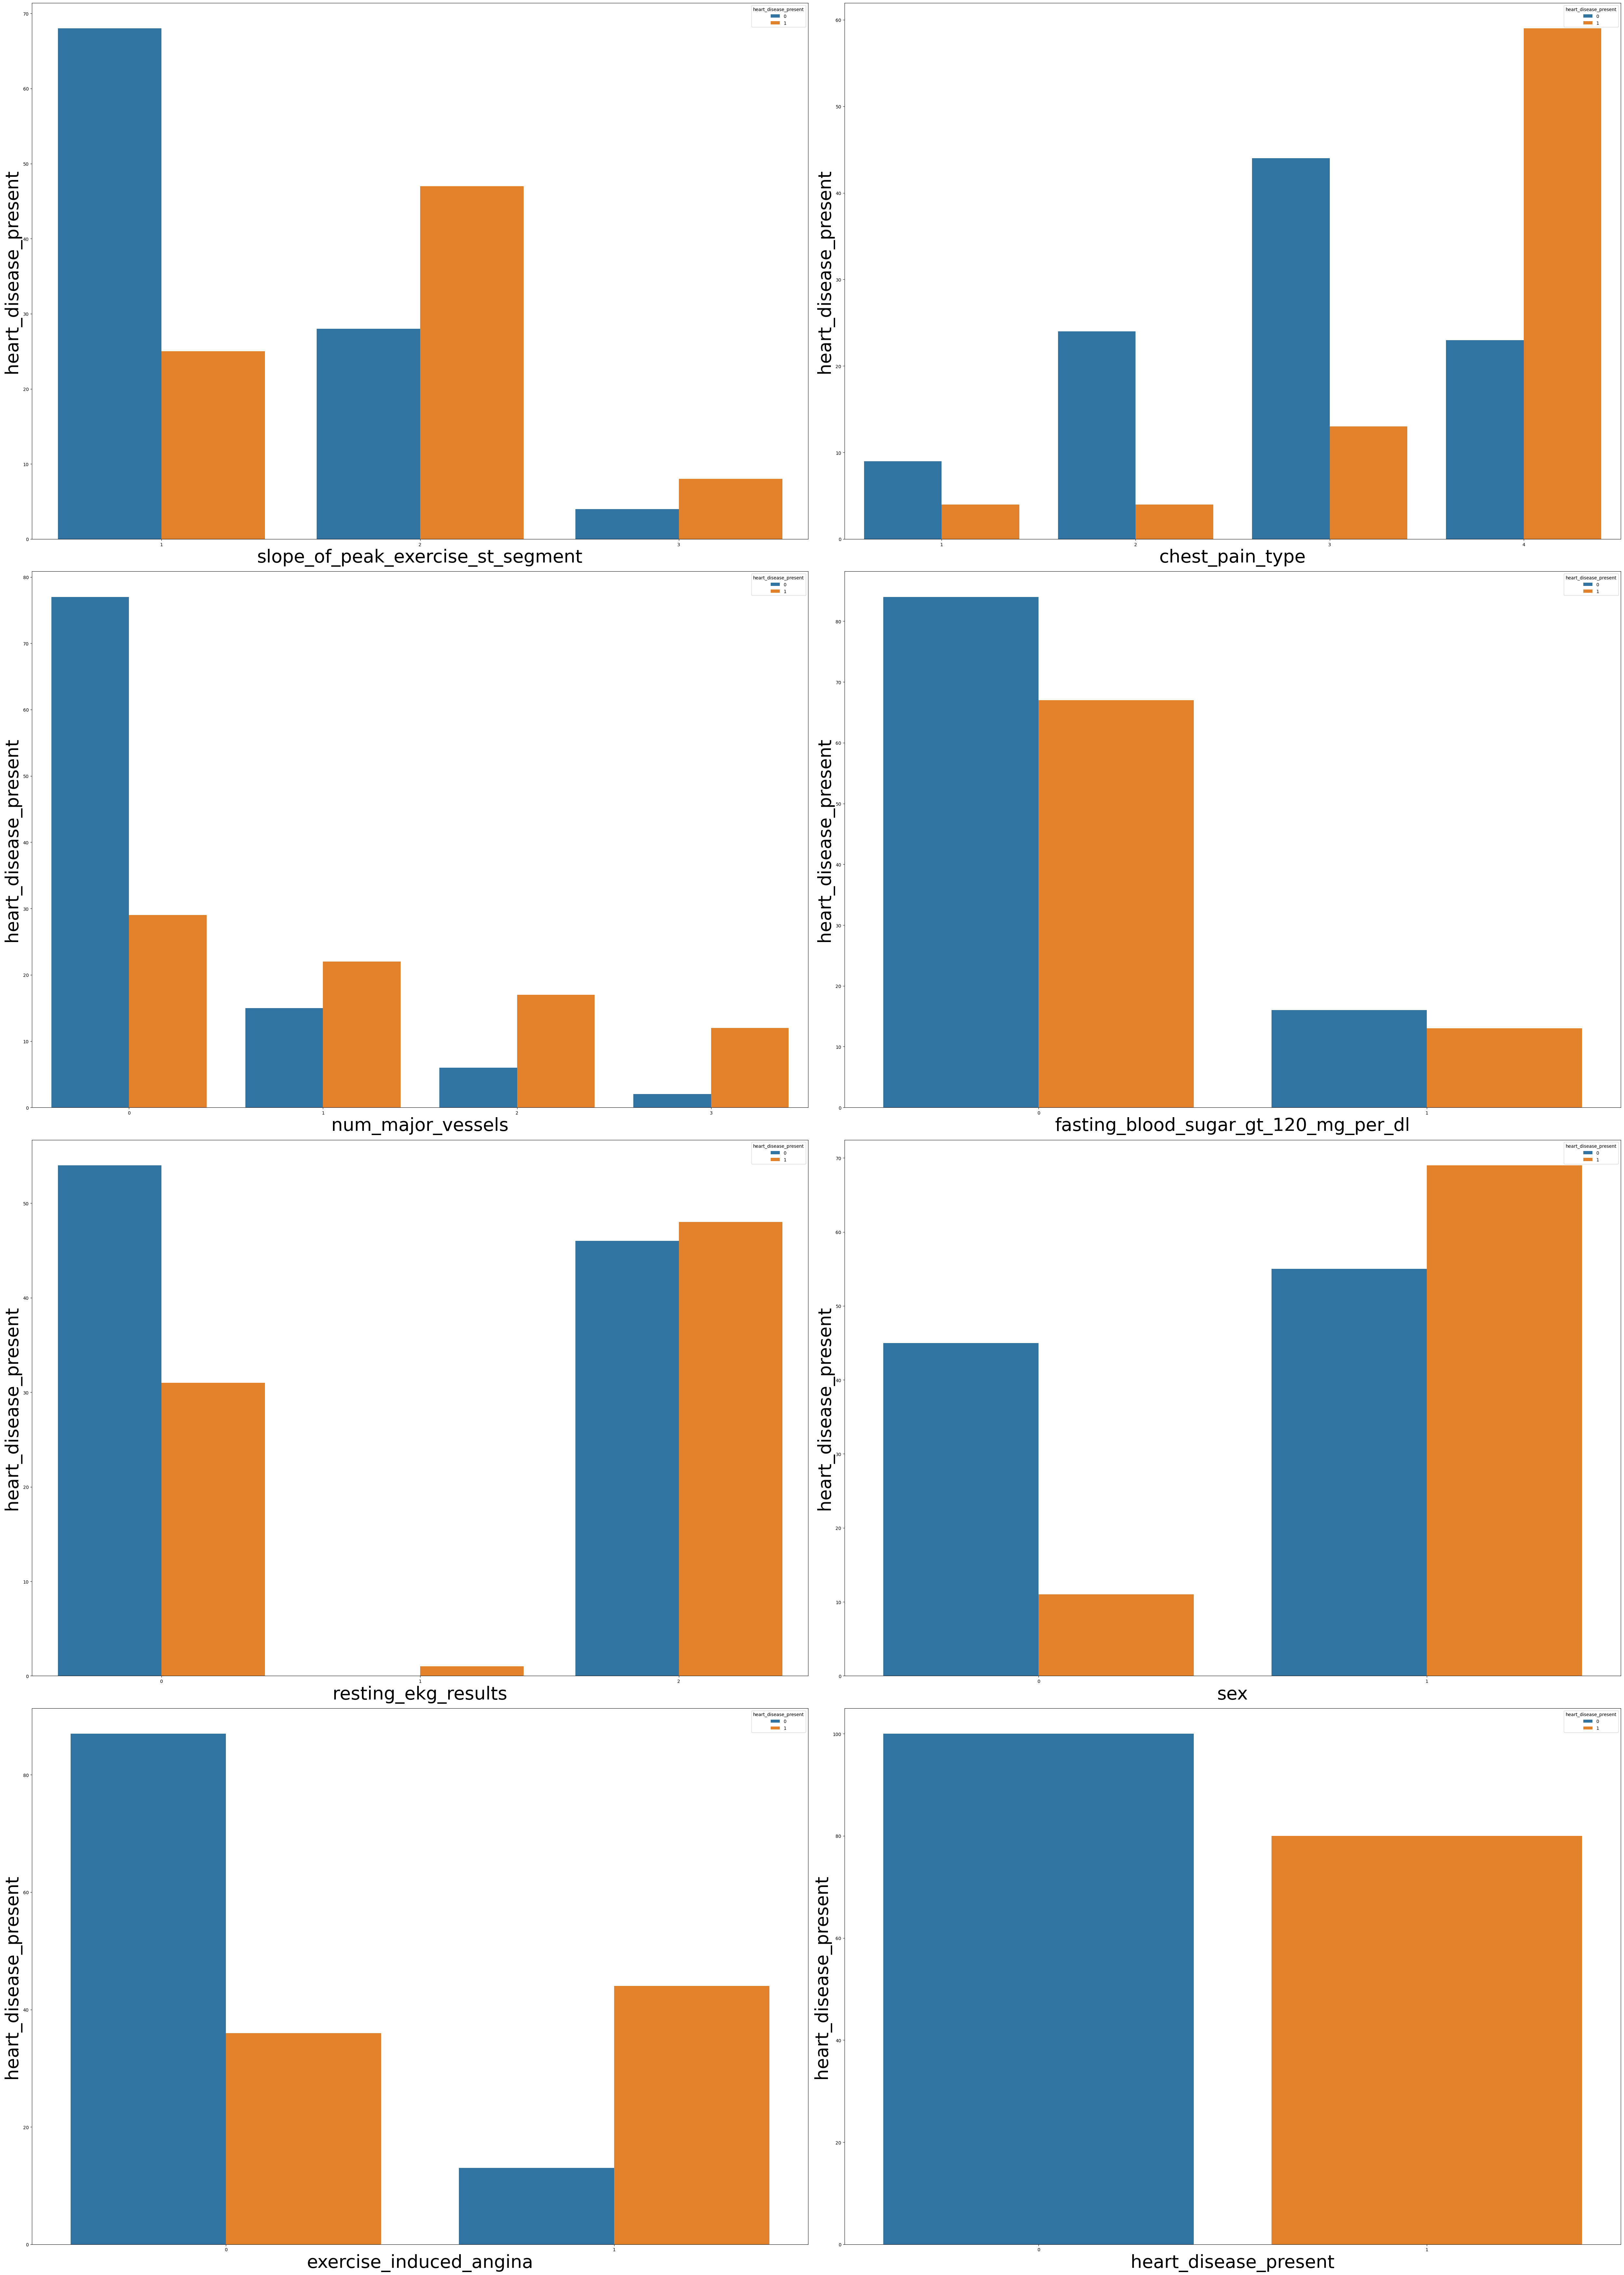

In [17]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,70), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data_cat:#for loop to acess columns form data1
    if plotnumber<=8 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,2,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column].dropna(axis=0)#plotting count plot
                        ,hue=data.heart_disease_present)
        plt.xlabel(column,fontsize=40)#assigning name to x-axis and increasing it's font
        plt.ylabel('heart_disease_present',fontsize=40)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

# Insights

# Checking Outliers

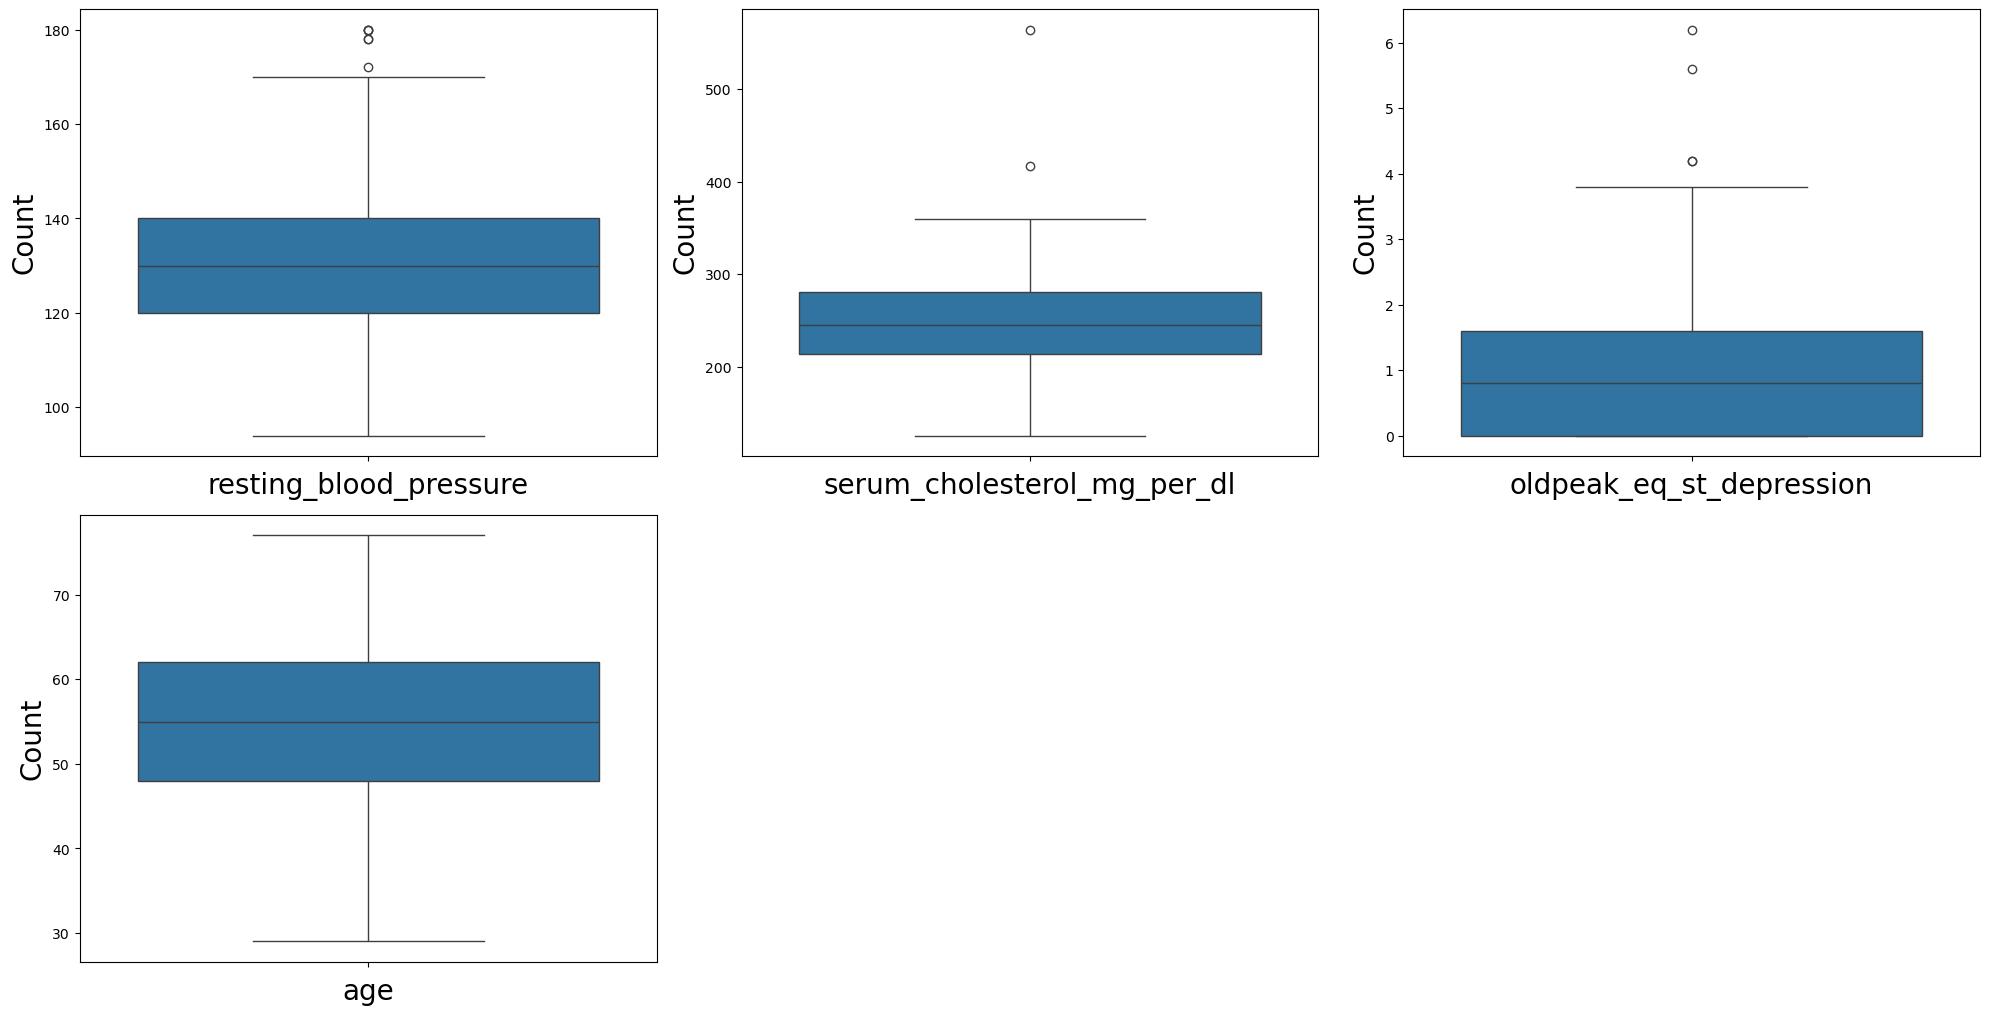

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_dis:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

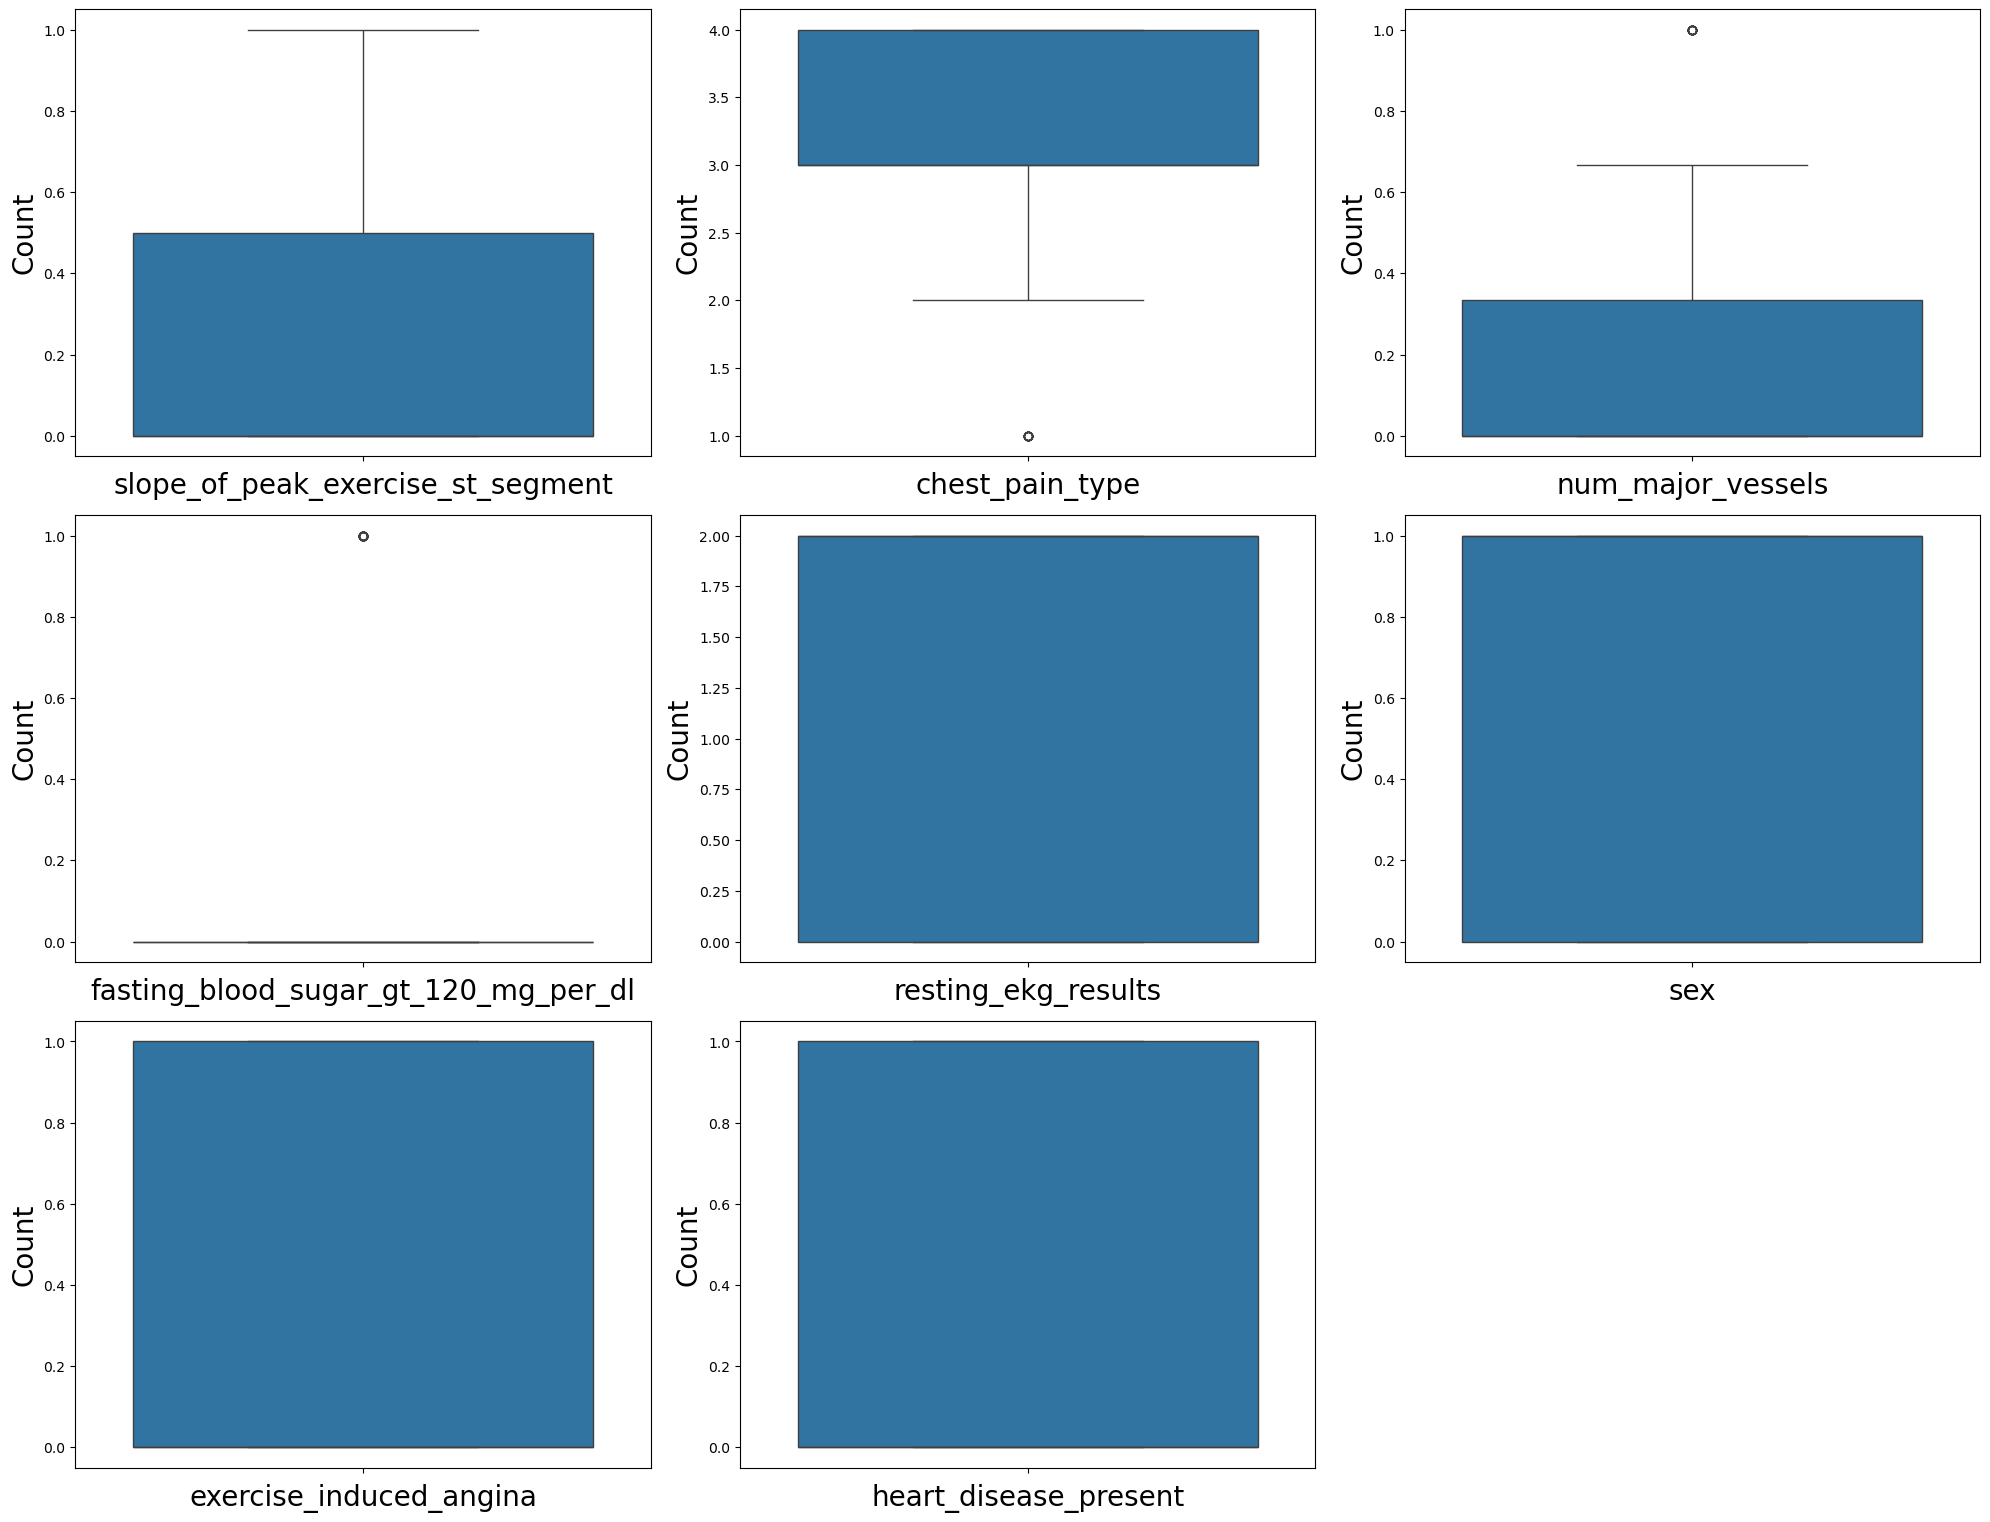

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_cat:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Insights

# Finding and handling the Outliers

In [19]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    median_value = data[column].median()
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return data

# Replacing outliers for specific columns with median
data = replace_outliers_with_median(data, 'resting_blood_pressure')
data = replace_outliers_with_median(data, 'serum_cholesterol_mg_per_dl')
data = replace_outliers_with_median(data, 'oldpeak_eq_st_depression')


In [20]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128.0,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,0,110.0,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,0,125.0,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152.0,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130.0,1,0,0,2,270.0,0.8,1,59,145,0,0


# Scaling the Data 

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale
features_to_scale = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
                     'oldpeak_eq_st_depression', 'age',
                     'max_heart_rate_achieved', 'num_major_vessels', 
                     'slope_of_peak_exercise_st_segment']

scaler = MinMaxScaler()

# Applying the scaling
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [26]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0,0.447368,2,0.0,0,2,0.777778,0.000000,1,0.333333,0.698113,0,0
1,0.5,0,0.210526,3,0.0,0,0,0.376068,0.421053,0,0.520833,0.584906,0,0
2,0.0,0,0.407895,4,1.0,0,2,0.760684,0.000000,1,1.000000,0.622642,1,1
3,0.0,1,0.763158,4,0.0,0,0,0.414530,0.000000,1,0.229167,0.801887,0,1
4,1.0,1,0.473684,1,0.0,0,2,0.615385,0.210526,1,0.625000,0.462264,0,0


In [28]:
data.heart_disease_present.value_counts()  

heart_disease_present
0    100
1     80
Name: count, dtype: int64

# Feature Selection

<Axes: >

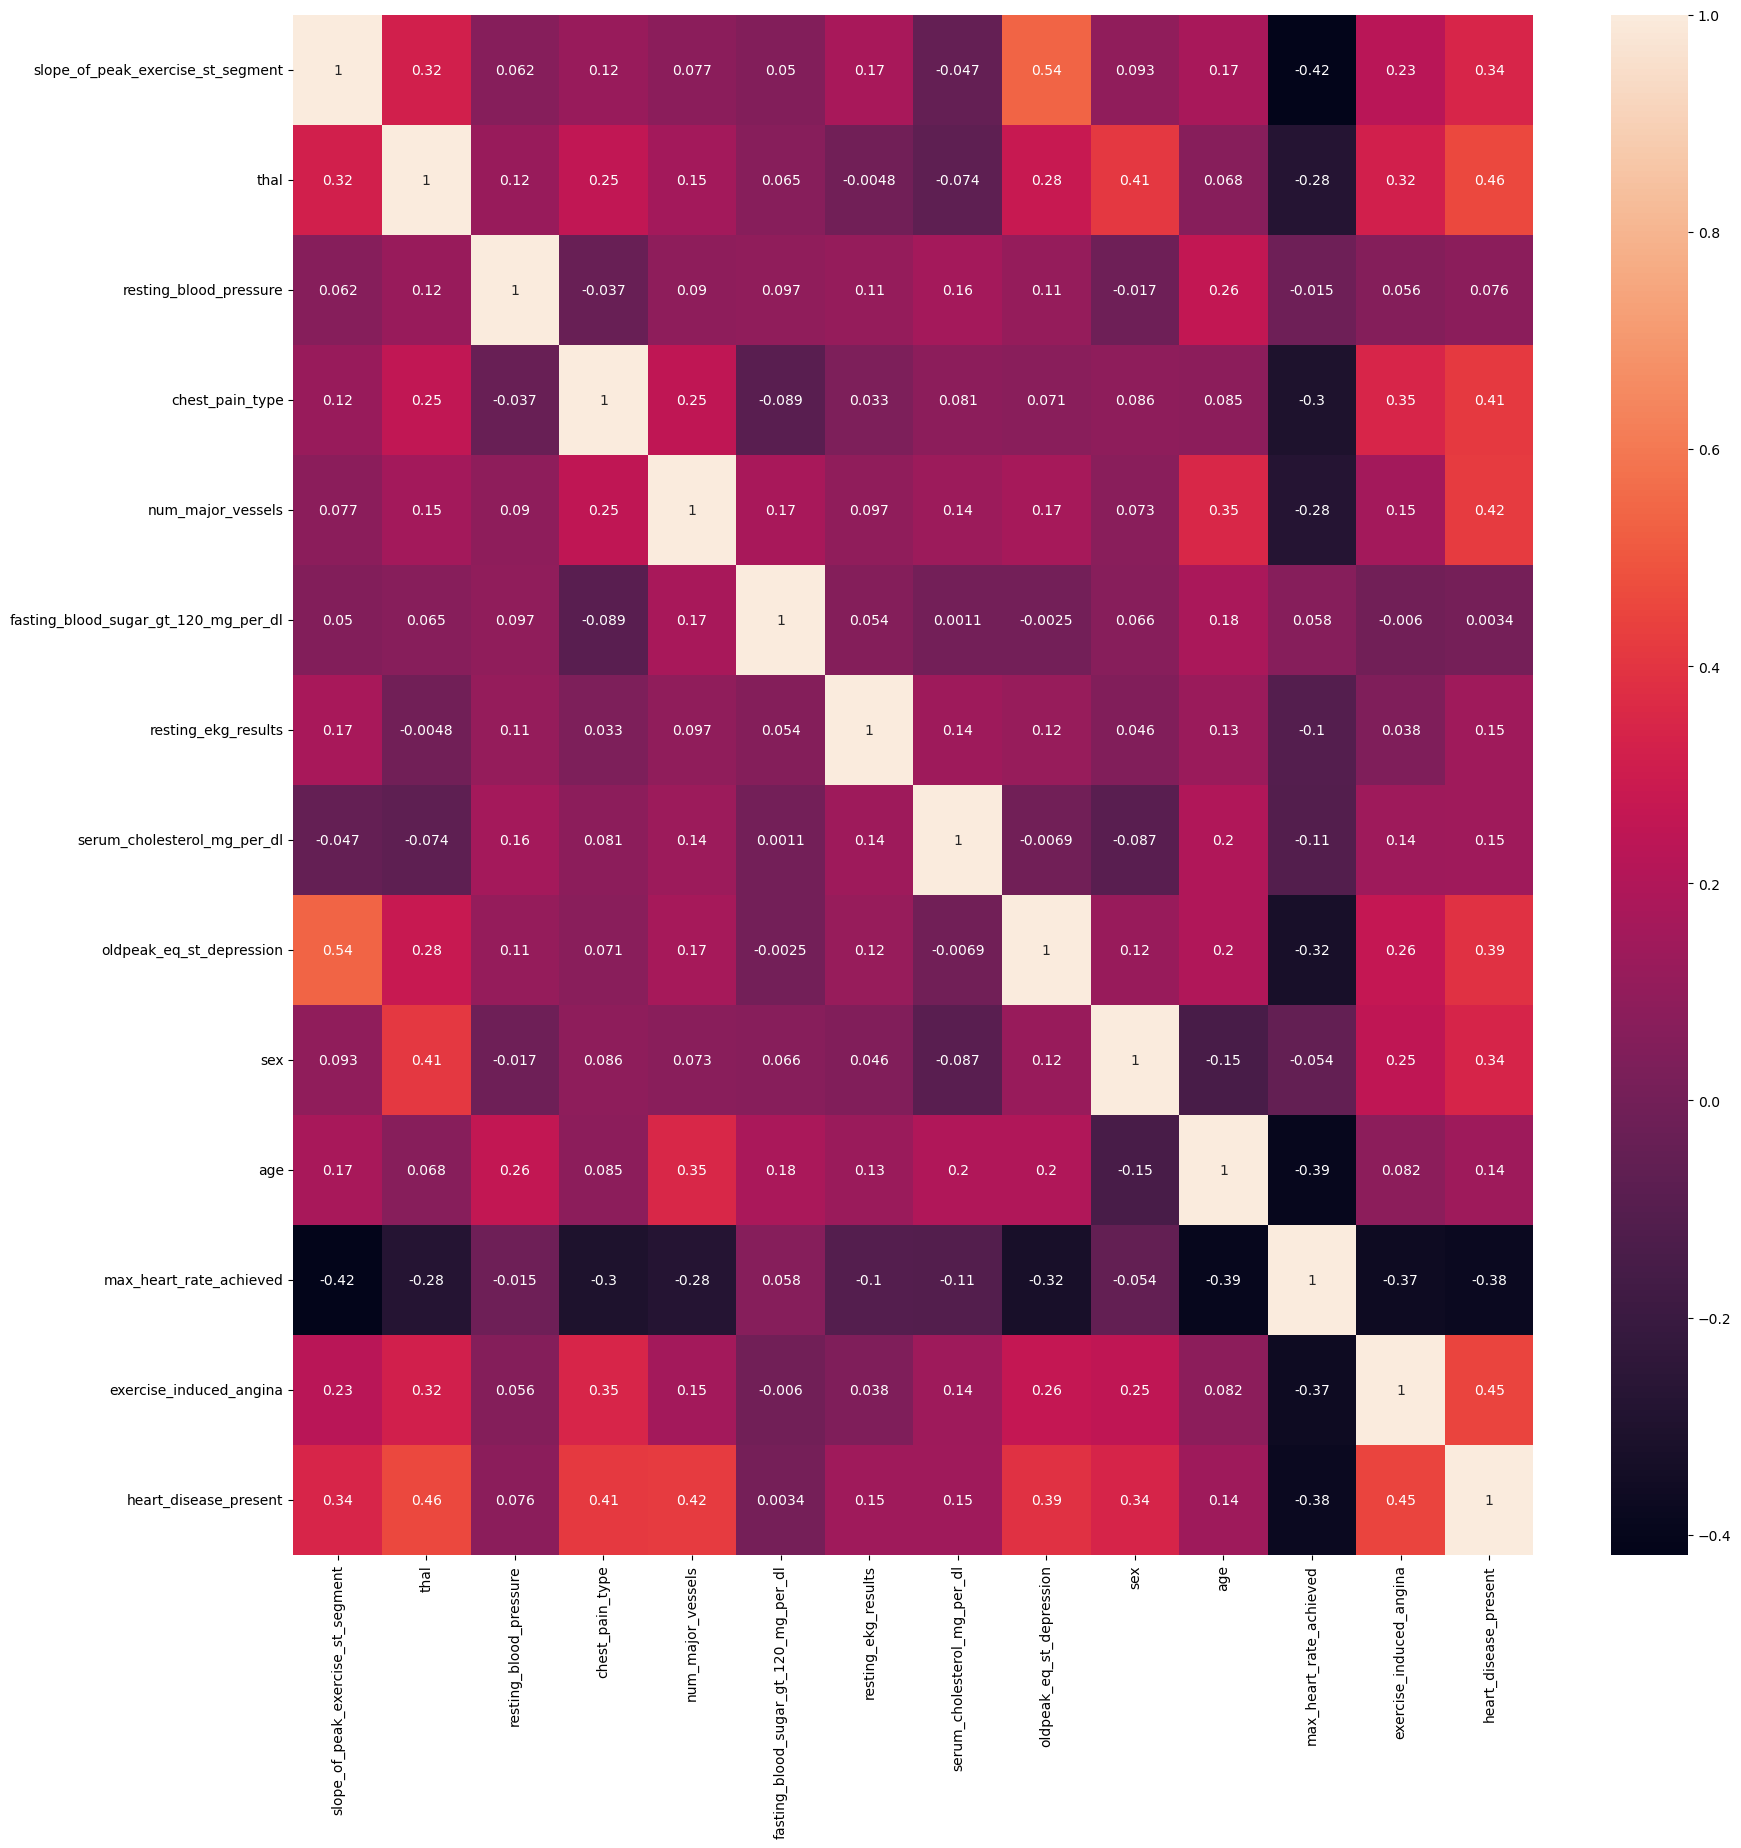

In [39]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr() , annot = True)

In [40]:
X = data.iloc[:,:-1]
y = data.heart_disease_present

# Preparing training and testing data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train.shape

(135, 13)

In [44]:
X_test.shape

(45, 13)

# Model Training 

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with GridSearchCV
def evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    lr_model = LogisticRegression()
    param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}

    grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
    grid_search_lr.fit(X_train, y_train)

    best_lr = grid_search_lr.best_estimator_
    y_pred_lr = best_lr.predict(X_test)

    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    roc_auc_lr = roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1])
    
    print(f"Best Parameters: {grid_search_lr.best_params_}")
    print(f"Accuracy: {accuracy_lr:.4f}")
    print(f"ROC-AUC: {roc_auc_lr:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_lr))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_lr))

    return best_lr

# Call function for Logistic Regression
best_lr_model = evaluate_logistic_regression(X_train, y_train, X_test, y_test)


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.8222
ROC-AUC: 0.8765
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45

Confusion Matrix:
[[19  0]
 [ 8 18]]


# Random Forest Classifier

In [61]:
# Random Forest Classifier with Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Grid Search for Random Forest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf = grid_rf.predict(X_test)
print("Random Forest Results:")
print("Best Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Random Forest Results:
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



# Support Vector Classifier (SVC)

In [62]:
# Support Vector Classifier with Grid Search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize SVC
svc = SVC(probability=True)

# Grid Search for SVC
grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, verbose=2, n_jobs=-1)
grid_svc.fit(X_train, y_train)

# Predict and Evaluate
y_pred_svc = grid_svc.predict(X_test)
print("SVC Results:")
print("Best Params:", grid_svc.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVC Results:
Best Params: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier with GridSearchCV
def evaluate_decision_tree(X_train, y_train, X_test, y_test):
    dt_model = DecisionTreeClassifier()
    param_grid_dt = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}

    grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
    grid_search_dt.fit(X_train, y_train)

    best_dt = grid_search_dt.best_estimator_
    y_pred_dt = best_dt.predict(X_test)

    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    roc_auc_dt = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
    
    print(f"Best Parameters: {grid_search_dt.best_params_}")
    print(f"Accuracy: {accuracy_dt:.4f}")
    print(f"ROC-AUC: {roc_auc_dt:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_dt))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_dt))

    return best_dt

# Call function for Decision Tree
best_dt_model = evaluate_decision_tree(X_train, y_train, X_test, y_test)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5}
Accuracy: 0.6667
ROC-AUC: 0.7136
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        19
           1       0.79      0.58      0.67        26

    accuracy                           0.67        45
   macro avg       0.68      0.68      0.67        45
weighted avg       0.70      0.67      0.67        45

Confusion Matrix:
[[15  4]
 [11 15]]


#  K-Nearest Neighbors (KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with GridSearchCV
def evaluate_knn(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier()
    param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

    grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
    grid_search_knn.fit(X_train, y_train)

    best_knn = grid_search_knn.best_estimator_
    y_pred_knn = best_knn.predict(X_test)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    roc_auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
    
    print(f"Best Parameters: {grid_search_knn.best_params_}")
    print(f"Accuracy: {accuracy_knn:.4f}")
    print(f"ROC-AUC: {roc_auc_knn:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_knn))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_knn))

    return best_knn

# Call function for KNN
best_knn_model = evaluate_knn(X_train, y_train, X_test, y_test)


Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.8444
ROC-AUC: 0.8806
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45

Confusion Matrix:
[[19  0]
 [ 7 19]]


In [65]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Bagging Classifier

# Bagging with Decision Trees as the base estimator
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Prediction
y_pred_bagging = bagging_model.predict(X_test)

# Evaluation
print("Bagging Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

### 2. AdaBoost Classifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Prediction
y_pred_ada = ada_model.predict(X_test)

# Evaluation
print("AdaBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

### 3. Gradient Boosting Classifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

### 4. XGBoost Classifier

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Bagging Classifier Results:
Accuracy: 0.7777777777777778
[[18  1]
 [ 9 17]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.78        19
           1       0.94      0.65      0.77        26

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.78        45
weighted avg       0.83      0.78      0.78        45

AdaBoost Classifier Results:
Accuracy: 0.7777777777777778
[[16  3]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.86      0.73      0.79        26

    accuracy                           0.78        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.79      0.78      0.78        45

Gradient Boosting Classifier Results:
Accuracy: 0.8
[[17  2]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1 

In [67]:
data.thal.unique()

array([0, 1, 2], dtype=int64)